<a href="https://colab.research.google.com/github/DrMichaelGuo/Automation/blob/main/11_1_Clustering_k_means_(shared).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Objectives and Key Concepts

## Objectives

- **Understand Unsupervised Learning:**  
  Learn the difference between supervised and unsupervised learning.
- **Learn K‐Means Clustering:**  
  Grasp the working mechanism of the K‐means algorithm including the concepts of centroids, cluster assignments, and iteration until convergence.

## Key Concepts


## 📊 Comparison Table

|                      | **Supervised Learning**                | **Unsupervised Learning**                     |
|----------------------|----------------------------------------|-----------------------------------------------|
| **Data**             | Labelled data (input + output)         | Unlabelled data (no output labels)            |
| **Goal**             | Predict outcomes or classify data      | Find hidden patterns or groupings             |
| **Examples**         | Fraud detection, revenue forecasting   | Customer segmentation, anomaly detection      |
| **Output**           | Known during training                  | Unknown — algorithm finds it automatically    |



- **K‐Means Clustering Algorithm:**
  - **Initialisation:**  
    Randomly selecting \(K\) centroids.
  - **Assignment:**  
    Allocating each data point to the nearest centroid based on a distance measure (usually Euclidean distance).
  - **Update:**  
    Recalculating centroids as the mean of the data points assigned to each cluster.
  - **Iteration:**  
    Repeating the assignment and update steps until the clusters stabilise.

- **Choosing \(K\):**  
  Methods such as the elbow method are used to determine the optimal number of clusters.



# Simple Explanation

Imagine you have a big bag of sweets. You **randomly throw** all the sweets onto the table. Now they’re scattered all over the place! You want to **tidy them up into groups**. You want **K-Means Clustering** to figure it out for you.

### 1. Step 1 – Random Centres  
First, K-Means picks a few **random spots on the table** (these are called *centroids*).  
You can think of them like little bowls where the groups will start.

### 2. Step 2 – Who’s Closest?  
Now, K-Means looks at every sweet and asks,  
> “Which plate am I closest to?”  
Each sweet joins the group that’s closest to it.

### 3. Step 3 – Move the Plates!  
Once the groups are made, K-Means moves each plate **to the middle** of the sweets in its group.  
It’s like finding the centre of the group.

### 4. Step 4 – Try Again!  
Now that the plates have moved, K-Means checks all the sweets again.  
> “Am I still closest to this plate, or should I move to another one?”  
The sweets might change groups, and then the plates move to the new centres again.

### 5. Keep Going Until It Stops  
K-Means keeps doing this—moving plates and regrouping sweets—until everything **settles down**, and the groups don’t change anymore.


# 2. Follow me Demostration: Client Segmentation (Simple Example)

We have a dataset of 30 clients, each with:

- Annual Revenue (£000s)
- Risk Score (1 - 100)

Task: Segment clients into groups to prioritise auditing and advisory services.




## Step 1: Create the Dataset

In [1]:
import pandas as pd

# Create a dataset with 30 clients
data = {
    'Client': [
        'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6', 'CL7', 'CL8', 'CL9', 'CL10',
        'CL11', 'CL12', 'CL13', 'CL14', 'CL15', 'CL16', 'CL17', 'CL18', 'CL19', 'CL20',
        'CL21', 'CL22', 'CL23', 'CL24', 'CL25', 'CL26', 'CL27', 'CL28', 'CL29', 'CL30'
    ],
    'Annual_Revenue': [
        100, 150, 200, 250, 300, 350, 400, 420, 430, 450,
        520, 550, 580, 600, 620, 630, 650, 670, 680, 700,
        720, 740, 750, 780, 800, 820, 850, 880, 900, 950
    ],
    'Risk_Score': [
        39, 81, 6, 77, 40, 50, 60, 20, 30, 55,
        25, 35, 45, 50, 60, 55, 47, 65, 70, 75,
        40, 35, 85, 15, 80, 90, 10, 25, 95, 5
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Show the first few rows
df.head()


,Client,Annual_Revenue,Risk_Score
0,CL1,100,39
1,CL2,150,81
2,CL3,200,6
3,CL4,250,77
4,CL5,300,40


## Step 2: Visualise the Data

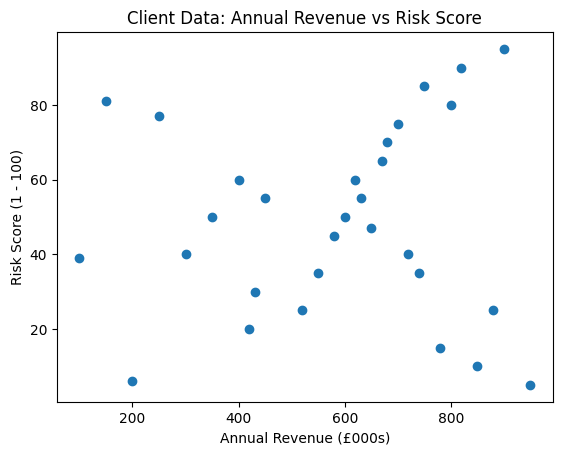

In [2]:
import matplotlib.pyplot as plt

# Scatter plot of the clients
plt.scatter(df['Annual_Revenue'], df['Risk_Score'])
plt.xlabel('Annual Revenue (£000s)')
plt.ylabel('Risk Score (1 - 100)')
plt.title('Client Data: Annual Revenue vs Risk Score')
plt.show()


## Step 3: Apply K-Means Clustering (say 3 Clusters)

In [3]:
from sklearn.cluster import KMeans

# Select features
features = df[['Annual_Revenue', 'Risk_Score']]

# Create the KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model and predict clusters
df['Cluster'] = kmeans.fit_predict(features)

# Show the table with cluster assignments
df


,Client,Annual_Revenue,Risk_Score,Cluster
0,CL1,100,39,2
1,CL2,150,81,2
2,CL3,200,6,2
3,CL4,250,77,2
4,CL5,300,40,2
5,CL6,350,50,2
6,CL7,400,60,0
7,CL8,420,20,0
8,CL9,430,30,0
9,CL10,450,55,0


## Step 4: Visualise the Clusters

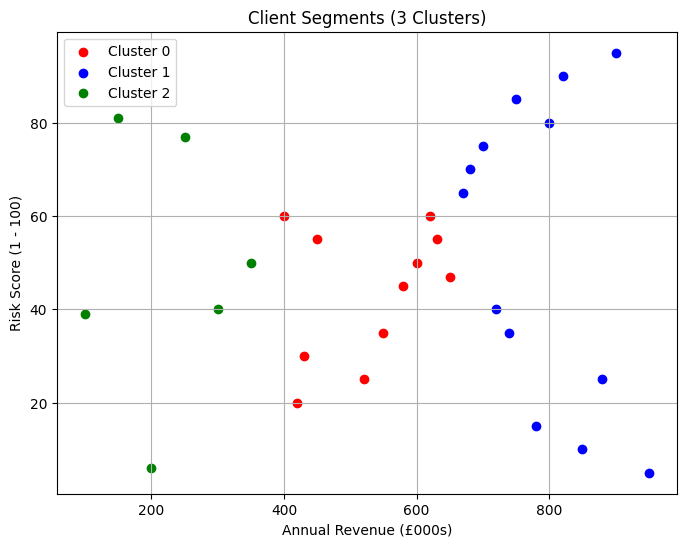

In [4]:
# Plot clustered data points
plt.figure(figsize=(8, 6))

# Custom colour scheme
colors = ['red', 'blue', 'green']

# Loop through each cluster
for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Annual_Revenue'],
        cluster_data['Risk_Score'],
        color=colors[cluster],
        label=f'Cluster {cluster}'
    )

plt.xlabel('Annual Revenue (£000s)')
plt.ylabel('Risk Score (1 - 100)')
plt.title('Client Segments (3 Clusters)')
plt.legend()
plt.grid(True)
plt.show()


This chart shows the segmentation of clients into three distinct clusters based on their annual revenue and risk scores.
- **Cluster 0 (red)** includes clients with **moderate revenue and mid-level risk**, representing stable but average-risk accounts.
- **Cluster 1 (blue)** consists of **high-revenue clients**, some of whom carry significant risk, indicating the need for careful risk management despite their value.
- **Cluster 2 (green)** groups **lower-revenue clients with varying**, often higher, risk scores, suggesting these accounts may require closer monitoring.
- The segmentation helps prioritise clients for audit, advisory, or risk assessment purposes.

## Optional Challenge

Try 4 clusters and see how it changes your segmentation.

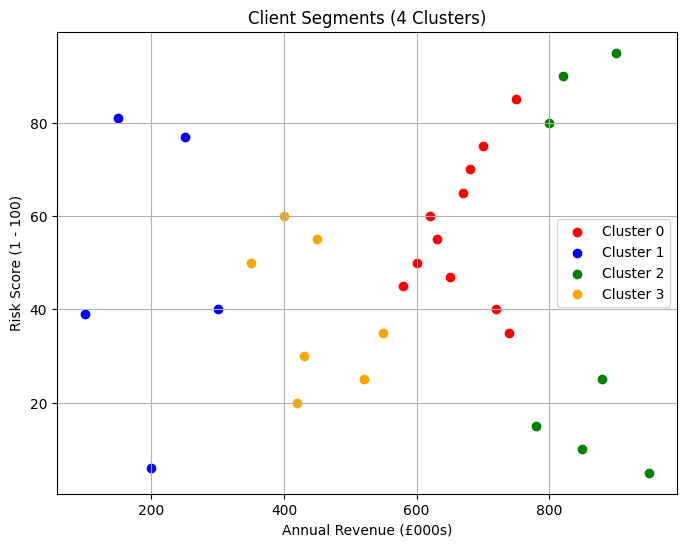

In [5]:
# 4 Clusters Example
kmeans = KMeans(n_clusters=4, random_state=0)
df['Cluster'] = kmeans.fit_predict(features)

plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'orange']

for cluster in range(4):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Annual_Revenue'],
        cluster_data['Risk_Score'],
        color=colors[cluster],
        label=f'Cluster {cluster}'
    )

plt.xlabel('Annual Revenue (£000s)')
plt.ylabel('Risk Score (1 - 100)')
plt.title('Client Segments (4 Clusters)')
plt.legend()
plt.grid(True)
plt.show()


# 3. Follow Me Activity: Slient segmentation (2000 customers)

## Step 1: Importing Libraries and Loading Data

For this example, we will use a **synthetic dataset** representing **clients**. You can later replace it with your own dataset.

## Step 1: Import Libraries and Load Data

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [18]:
# Generate a simple synthetic dataset for client segmentation
np.random.seed(42) # Ensures reproducibility
data = {
    'Annual_Income': np.random.normal(50, 15, 2000), # mean, SD, population
    'Risk_Score': np.random.normal(50, 20, 2000)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Show the first few rows
df.head()


,Annual_Income,Risk_Score
0,57.450712,36.496435
1,47.926035,47.109627
2,59.715328,34.151602
3,72.845448,43.840769
4,46.487699,12.127707


## Step 2: Data Preprocessing (Standardisation)
Scaling the features is crucial for clustering.

In [19]:
# Create an instance of StandardScaler
# This tool standardises features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Fit the scaler to the DataFrame 'df' and transform the data
# This scales both 'Annual_Income' and 'Risk_Score' so they have a mean of 0 and standard deviation of 1
scaled_features = scaler.fit_transform(df)


This block standardises the dataset df by scaling its features (i.e. Annual Income and Risk Score), so they are on the same scale before applying K-Means Clustering.

👉 If one feature (e.g., Annual_Income) has a larger range of values than another feature (e.g., Risk_Score), it can dominate the distance calculation and bias the clustering results.

## Step 3: Determining the Optimal Number of Clusters (Elbow Method)
Plot the inertia for different values of K to identify the optimal number of clusters.

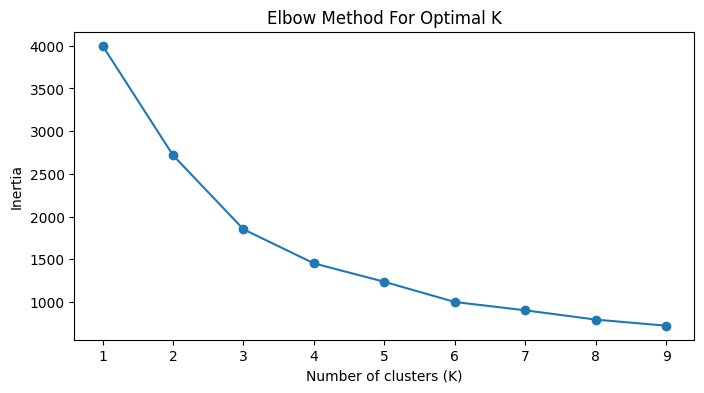

In [20]:
# Create an empty list to store inertia values for each K
inertia = []

# Define a range of K values to test (from 1 to 9 clusters)
K_range = range(1, 10)

# Loop through each K value to fit a KMeans model and calculate inertia
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Create a figure with specified size for the plot
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')

# Display the plot
plt.show()


**Inertia** is a measure of how well the data points are clustered around the centroids. It represents the sum of squared distances between each data point and the centroid of its assigned cluster.

## Step 4: Running K‐Means Clustering
Assume the elbow method suggests K = 3. Run K‐Means with this value.

In [21]:
# Define the optimal number of clusters (K) based on the elbow method analysis
optimal_k = 3

# Create a KMeans model with the optimal number of clusters and a fixed random_state for reproducibility
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the KMeans model to the scaled data and predict the cluster for each data point
df['Cluster'] = kmeans.fit_predict(scaled_features)

df.head()


,Annual_Income,Risk_Score,Cluster
0,57.450712,36.496435,1
1,47.926035,47.109627,0
2,59.715328,34.151602,1
3,72.845448,43.840769,1
4,46.487699,12.127707,1


## Step 5: Visualising the Clusters
Plot the client segments based on Annual Income and Risk Score.

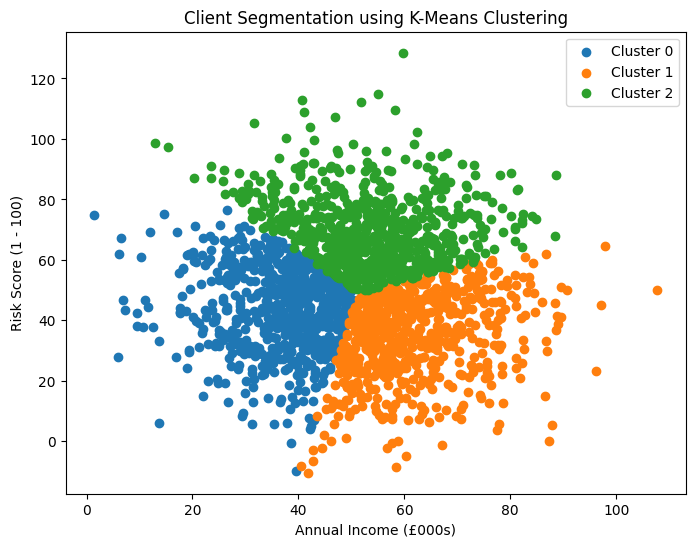

In [22]:
plt.figure(figsize=(8, 6))

for cluster in range(optimal_k):
    subset = df[df['Cluster'] == cluster]
    plt.scatter(subset['Annual_Income'], subset['Risk_Score'], label=f'Cluster {cluster}')

"""
What happens in the for loop:

It loops through each cluster (0, 1, 2 in this case because optimal_k = 3).
For each cluster, it selects only the rows from df that belong to that cluster.
It then plots the points from that cluster on the graph.
"""

plt.xlabel('Annual Income (£000s)')
plt.ylabel('Risk Score (1 - 100)')
plt.title('Client Segmentation using K-Means Clustering')
plt.legend()
plt.show()





### ✅ Interpretation of the Chart

This scatter plot shows **three client segments** based on **Annual Income (£000s)** and **Risk Score (1 - 100)**.

- 🔵 **Cluster 0 (Blue)**  
  - Low income (below £50k)  
  - Low to moderate risk  
  👉 Likely stable, lower-priority clients.

- 🟠 **Cluster 1 (Orange)**  
  - Medium income (£40k - £60k)  
  - High risk (above 60)  
  👉 High-risk clients needing closer monitoring or audits.

- 🟢 **Cluster 2 (Green)**  
  - High income (above £60k)  
  - Medium risk  
  👉 Valuable clients, potential for tailored services with risk oversight.

### ✅ Usefulness
- **Risk assessment**: Focus on high-risk clients in Cluster 1.
- **Audit planning**: Prioritise based on income and risk.
- **Targeted services**: Offer premium services to high-income clients in Cluster 2.



Play... clustering 2 million clients...